# 4. Higher-dimensional boxes

In [2]:
using IntervalArithmetic

We can approximate general sets in 1D using finite unions of intervals.
The equivalent in higher dimensions is to use a union of **boxes**.

An $n$-dimensional **(interval) box** is a Cartesian product $X_1 \times X_2 \times \cdots \times X_n$ of intervals $X_i$.


Computationally, an $n$-dimensional box is just a vector of $n$ intervals. For performance we need to use fixed-size arrays from the `StaticArrays.jl` package. In `IntervalArithmetic.jl` these are wrapped into the `IntervalBox` type.

We can construct an `IntervalBox` in `IntervalArithmetic.jl` in a couple of ways:

In [3]:
IntervalBox(1..2, 3..4)

[1, 2] × [3, 4]

In [4]:
(1..2) × (3..4)   # \times<TAB>

[1, 2] × [3, 4]

In [7]:
X = IntervalBox(1..2, 4)  # second argument is the number of dimensions

[1, 2] × [1, 2] × [1, 2] × [1, 2]

In [8]:
typeof(X)

IntervalBox{4,Float64}

## Multidimensional functions

Evaluating a multidimensional scalar-valued function over a box is as simple as 

In [9]:
f( (x, y) ) = x^2 + y

f (generic function with 1 method)

In [10]:
X = (-1..1) × (-2..2)

[-1, 1] × [-2, 2]

In [11]:
f(X)

[-2, 3]

If the function is vector-valued, for performance reasons it is advisable to return an `SVector` from the `StaticArrays.jl` package:

In [20]:
using StaticArrays

In [21]:
g( (x, y) ) = SVector(x^2 + y, x - y)

g (generic function with 1 method)

In [22]:
g(X)

2-element SArray{Tuple{2},Interval{Float64},1,2} with indices SOneTo(2):
 [-2, 3]
 [-3, 3]

An alternative is to return an `IntervalBox`, but this makes the function less generic, for example if you wish to mix evaluating the same function at floating-point vectors and `IntervalBox`es.

## Plotting `IntervalBox`es

As we mentioned previously, using the `Plots.jl` package we can plot `IntervalBox`es:

In [24]:
X = (1..2) × (3..4)

[1, 2] × [3, 4]

In [25]:
using Plots

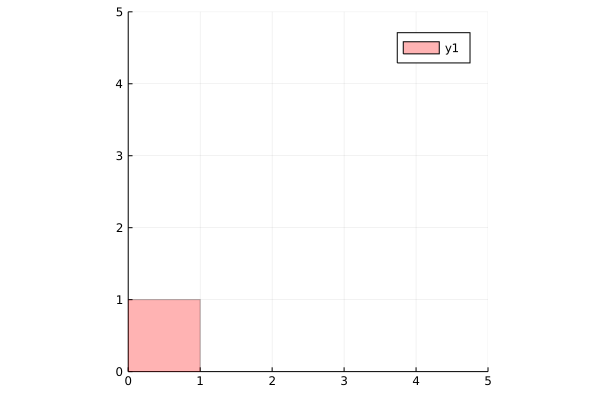

In [38]:
plot(X, alpha=0.3, c=:red, ratio=1, xlim=(0, 5), ylim=(0, 5))

#### Exercise

1. Draw (an over-approximation of) the image of the unit square under the Hénon map

    $$(x, y) \mapsto (1 - ax^2 + y, bx)$$

    for $a = 1.4$ and $b = 0.3$

    by using boxes.

## Set inversion

By using enough boxes of a small enough size we can approximate any given (finite) set.

As an example, consider the problem of finding the set in the plane given by $S := \{(x, y) \in \mathbb{R}^2: 1 \le x^2 + y^2 \le 2 \}$.  This can be written as $f^{-1}([1, 2])$, with $f(x, y) := x^2 + y^2$, so corresponds to a **set inversion** problem.

Suppose we have an initial box

In [49]:
X = IntervalBox(-5..5, 2)

[-5, 5] × [-5, 5]

We would like to find the subset of $X$ that definitely lies *inside* $S$ and a subset that definitely lies *outside* $S$. We will do so by splitting up $X$ into pieces. The simplest way to try to do this is by mincing each direction of $X$ again. (Soon we will see a more sophisticated method.)

We will have to restrict ourselves to sets with a certain minimum size, so there will also be boxes that we cannot prove to be either inside or outside.

#### Exercise

1. Write a function to do carry out set inversion. 


2. Apply it to the above set-inversion problem and visualize the result.